# Constructing a gauss random number generator, by adding several random numbers.
  
   
###   Authors: H. Jung, A. Bermudez Martinez, L.I. Estevez Banos, J. Lidrych, M. Mendizabal Morentin, S. Taheri Monfared, P. L.S. Connor, Q. Wang, H. Yang, R. Zlebcik 

First import what is needed

In [1]:
from ROOT import TH1D, gRandom, TCanvas
from math import sqrt

Welcome to JupyROOT 6.22/06


Define histograms with sum of random numbers

In [2]:
pointsA = [1, 2, 3, 6, 12, 20, 40]
histos = {}
for p in pointsA:
    histos[p] = TH1D(str(p), str(p), 100, -6, 6)


In [3]:
gRandom.SetSeed(32767) # initialise random number generator:

Fill the histograms with random numbers
here calculate the sum over the random numbers and fill them into the histos
calcualte it for the sum over 1,3,6,10,12,20,40 random numbers
in root then fit the distribution and determine the mean and sigma


In [4]:
for n in range(100000):
    for p in pointsA:
        x = 0.
        for n2 in range(p):
            x += gRandom.Uniform()
        histos[p].Fill((x - p/2.)/sqrt(p/12.))

In [5]:
print (" Gauss Random number generator ")

 Gauss Random number generator 


Plot normalized into single Graph

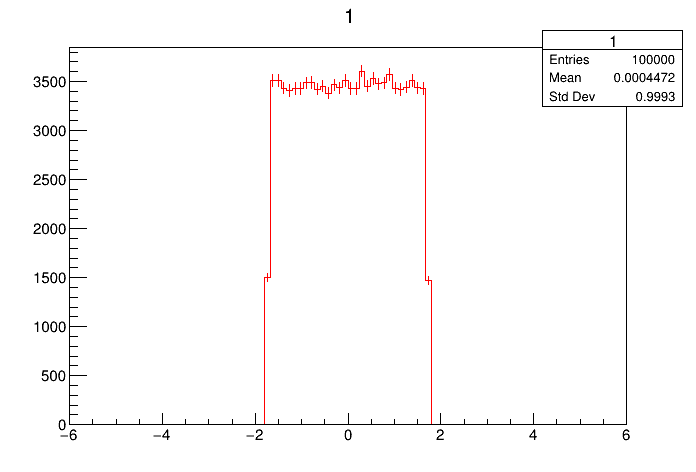

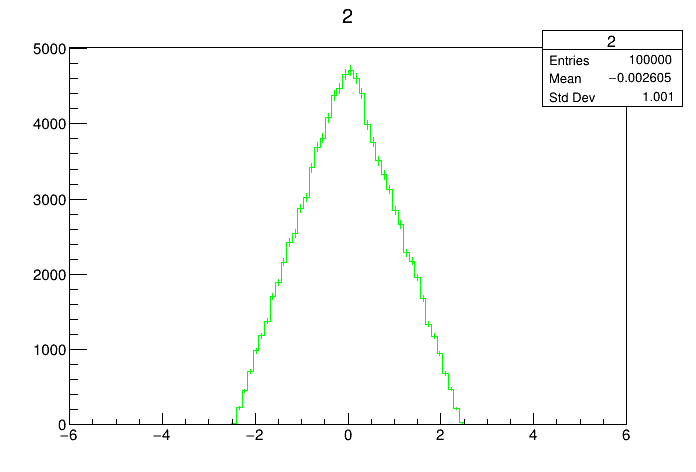

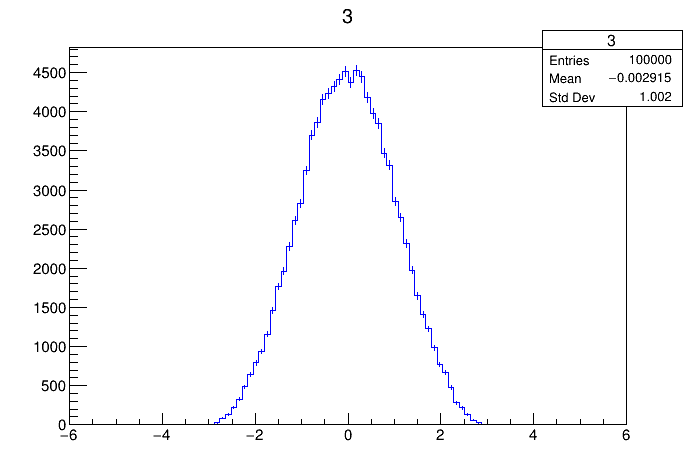

In [6]:
c = []
for p in pointsA[:3]:
    c.append(TCanvas())
    histos[p].SetLineColor(p+1)
    histos[p].Draw("hist e")
    c[-1].Draw()

Plot histograms together

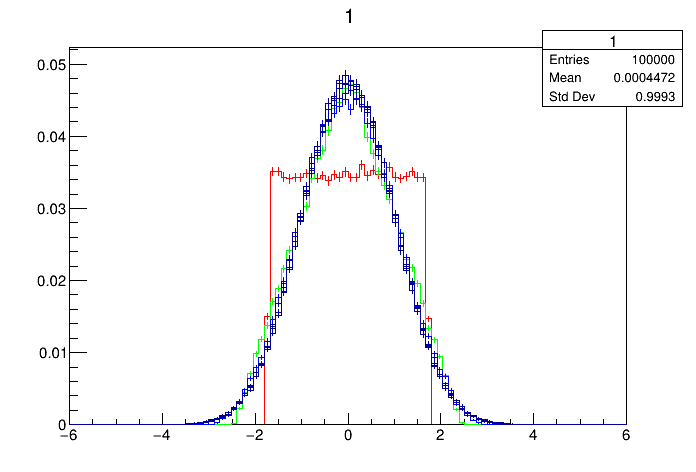

In [7]:
c.append(TCanvas())
for p in pointsA:
    histos[p].Scale(1./histos[p].Integral());
    histos[p].Draw("hist e" if p == 1 else "hist e same");
histos[1].SetMaximum(1.1*histos[40].GetMaximum())
c[-1].Draw()